In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import PIL.Image as Image


In [2]:
!pip install image

You should consider upgrading via the 'C:\Users\OMEN\anaconda3\envs\transfer_learning\python.exe -m pip install --upgrade pip' command.


In [3]:
import image

In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [5]:
dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset,  cache_dir='.', untar=True)


In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers[:5]

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg')]

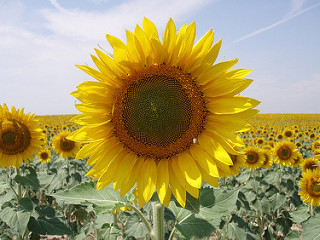

In [9]:
Image.open(str(sunflowers[1]))


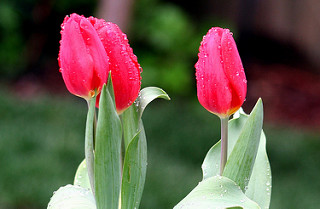

In [10]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [11]:
flowers_images = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [14]:
str(flowers_images['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flowers_images['roses'][0]))
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
X[0].shape

(224, 224, 3)

In [23]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [24]:
x0_resized = cv2.resize(X[1], IMAGE_SHAPE)
x1_resized = cv2.resize(X[2], IMAGE_SHAPE)
x2_resized = cv2.resize(X[3], IMAGE_SHAPE)
x2_resized = cv2.resize(X[4], IMAGE_SHAPE)
x2_resized = cv2.resize(X[5], IMAGE_SHAPE)

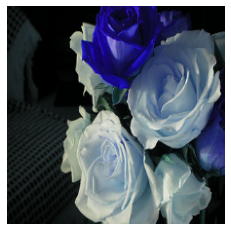

In [25]:
plt.axis('off')
plt.imshow(X[1])

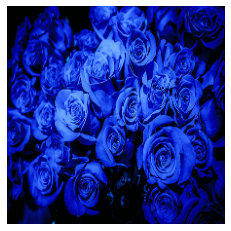

In [26]:
plt.axis('off')
plt.imshow(X[2])

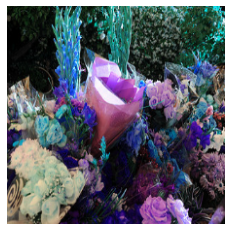

In [27]:
plt.axis('off')
plt.imshow(X[3])

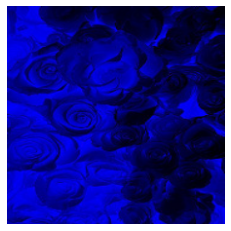

In [28]:
plt.axis('off')
plt.imshow(X[4])

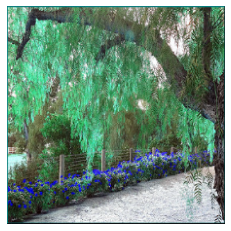

In [29]:
plt.axis('off')
plt.imshow(X[5])

In [30]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [31]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Train on 2752 samples
Epoch 1/5
2752/2752 [==============================] - 42s 15ms/sample - loss: 0.7643 - acc: 0.7235
Epoch 2/5
2752/2752 [==============================] - 40s 14ms/sample - loss: 0.3999 - acc: 0.8666
Epoch 3/5
2752/2752 [==============================] - 38s 14ms/sample - loss: 0.3117 - acc: 0.9004
Epoch 4/5
2752/2752 [==============================] - 38s 14ms/sample - loss: 0.2610 - acc: 0.9186
Epoch 5/5
2752/2752 [==============================] - 38s 14ms/sample - loss: 0.2247 - acc: 0.9350


In [33]:
model.evaluate(X_test_scaled,y_test)

918/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.37351200361137554, 0.86601305]

In [34]:
loss = pd.DataFrame(model.history.history)

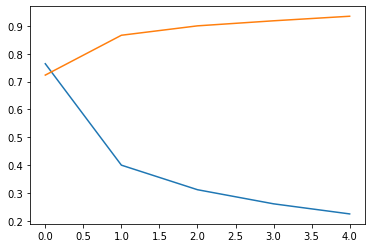

In [35]:
plt.plot(loss)